In [2]:
import numpy as np
import ast
import pandas as pd
import os
import matplotlib.pyplot as plt
import dill
import requests
import xmltodict
import cvxpy as cp
import itertools
import networkx as nx
import plotly.express as px

from scipy.special import logsumexp

%matplotlib inline
%matplotlib inline
# sns.set(style='darkgrid', palette='viridis', context='talk')

os.chdir(os.path.expanduser('~/dev/vivarium-ecoli'))

from ecoli.processes.metabolism_redux_classic import NetworkFlowModel, FlowResult
from ecoli.library.schema import numpy_schema, bulk_name_to_idx, listener_schema, counts
from ecoli.processes.registries import topology_registry
TOPOLOGY = topology_registry.access("ecoli-metabolism-redux")

In [3]:
# load basal new model
time = '2400'
date = '2025-04-02'
experiment = 'NEW'
condition = 'basal'
entry = f'{experiment}_{time}_{date}'
folder = f'out/metabolism-comparison/{condition}/{entry}/'

output = np.load(folder + '0_output.npy',allow_pickle='TRUE').item()
# output = np.load(r"out/geneRxnVerifData/output_glc.npy", allow_pickle=True, encoding='ASCII').tolist()
output = output['agents']['0']
fba_basal = output['listeners']['fba_results']
mass = output['listeners']['mass']
bulk = pd.DataFrame(output['bulk'])
f = open(folder + 'agent_steps.pkl', 'rb')
agent_basal = dill.load(f)
f.close()

In [4]:
metabolism = agent_basal['ecoli-metabolism-redux-classic']
# read tsv
aa = pd.read_csv('reconstruction/ecoli/flat/base_codes/amino_acids.tsv', sep='\t', index_col=0)
aa_list = aa.id.to_list()
aa_list

['L-ALPHA-ALANINE[c]',
 'ARG[c]',
 'ASN[c]',
 'L-ASPARTATE[c]',
 'CYS[c]',
 'GLT[c]',
 'GLN[c]',
 'GLY[c]',
 'HIS[c]',
 'ILE[c]',
 'LEU[c]',
 'LYS[c]',
 'MET[c]',
 'PHE[c]',
 'PRO[c]',
 'SER[c]',
 'THR[c]',
 'TRP[c]',
 'TYR[c]',
 'L-SELENOCYSTEINE[c]',
 'VAL[c]']

Text(0.5, 1.0, 'Basal')

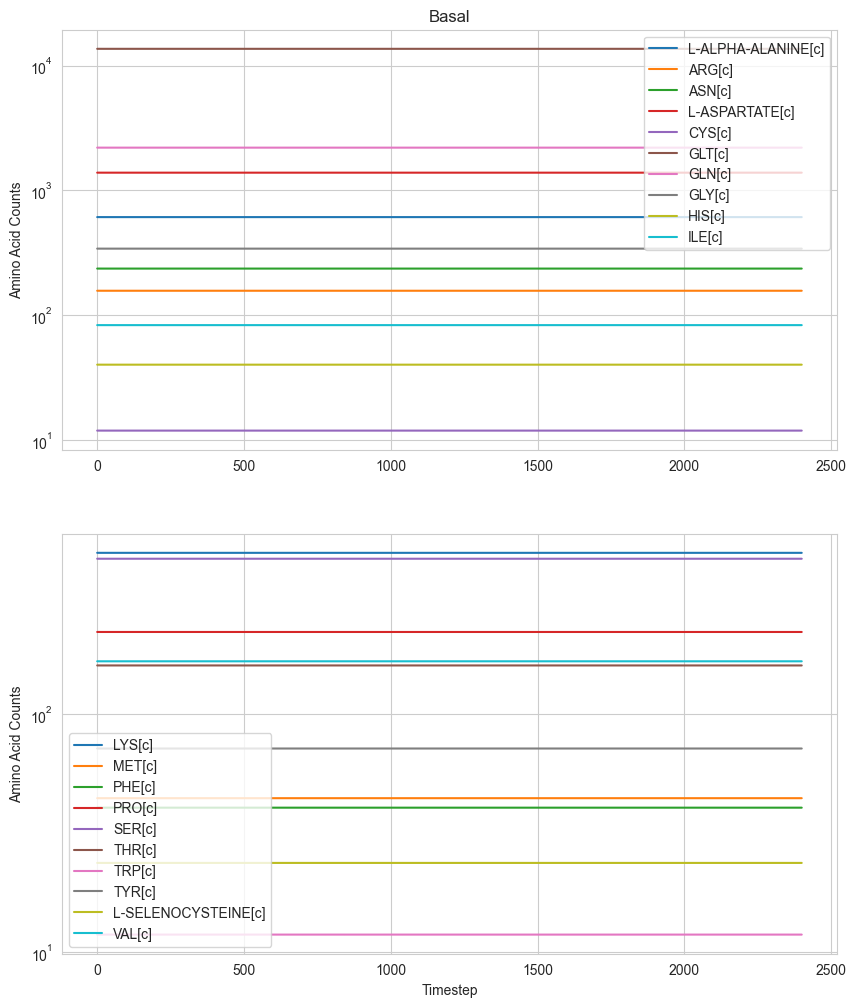

In [5]:
aa_bulk_idx = bulk_name_to_idx(aa_list, metabolism.bulk_ids)
aa_bulk = bulk.loc[:, aa_bulk_idx]
aa_bulk.columns = aa_list

# normalize by cell mass
aa_bulk = aa_bulk.div(mass['cell_mass'], axis=0)

# plot amino acid consumption. aa_bulk rows are timestep, columns are amino acids
# split in two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i in range(int(len(aa_list)/2)):
    axs[0].plot(aa_bulk.iloc[:,i], label=aa_list[i])
for i in range(int(len(aa_list)/2)+1, len(aa_list)):
    axs[1].plot(aa_bulk.iloc[:,i], label=aa_list[i])
axs[0].legend()
axs[0].set_ylabel('Amino Acid Counts')
axs[0].set_yscale('log')
axs[1].legend()
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Amino Acid Counts')
axs[1].set_yscale('log')
axs[0].set_title('Basal')

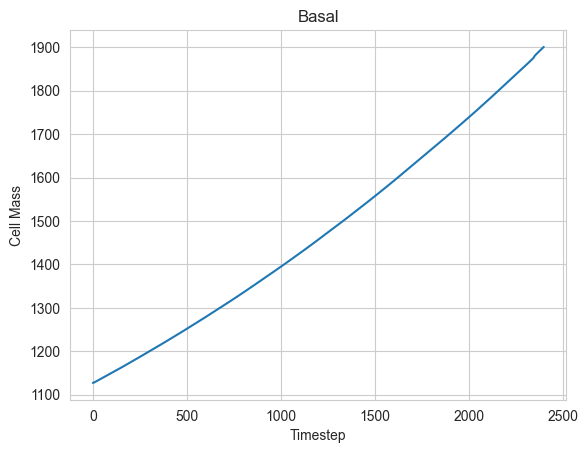

In [7]:
plt.plot(mass['cell_mass'])
plt.xlabel('Timestep')
plt.ylabel('Cell Mass')
plt.title('Basal')
plt.show()

Text(0.5, 1.0, 'Basal')

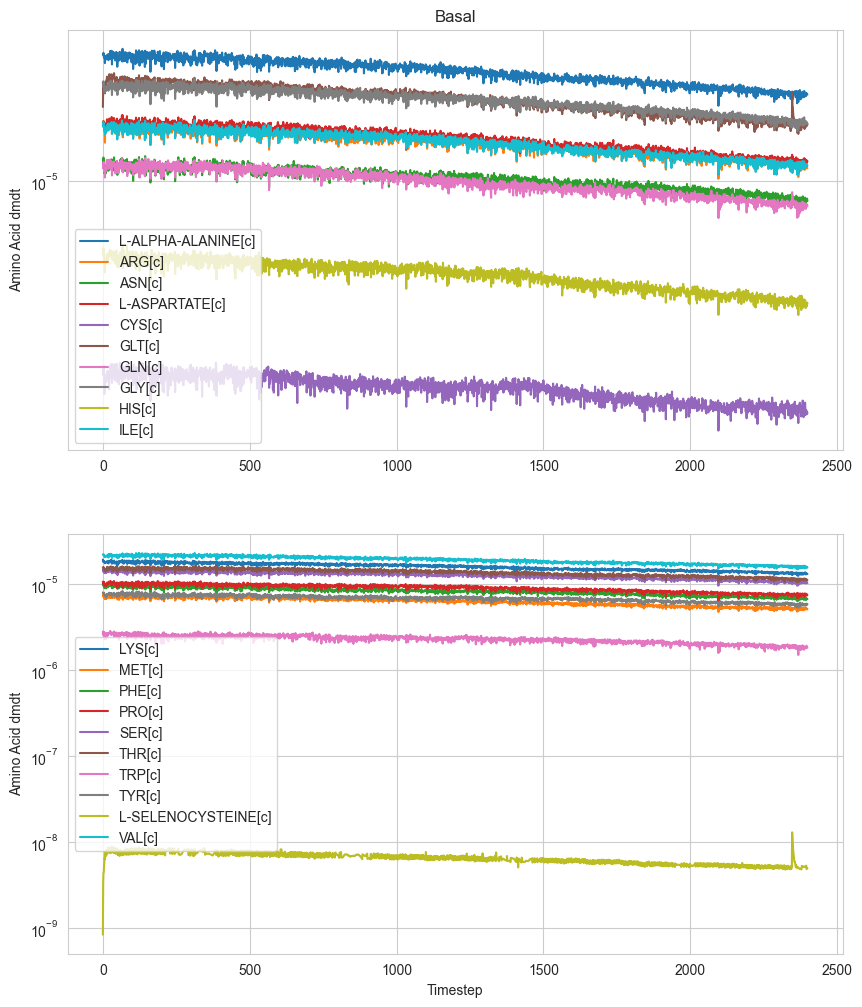

In [8]:
# plot dmdt versus time
aa_met_idx = [metabolism.network_flow_model.met_map[met] for met in aa_list]
dmdt = np.array(fba_basal['solution_dmdt'][1:])
dmdt = dmdt[:, aa_met_idx]
cell_mass = np.array(mass['cell_mass'][1:])
dmdt = dmdt/cell_mass[:,None]

fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i in range(int(len(aa_list)/2)):
    axs[0].plot(dmdt[:,i], label=aa_list[i])
for i in range(int(len(aa_list)/2)+1, len(aa_list)):
    axs[1].plot(dmdt[:,i], label=aa_list[i])
axs[0].legend()
axs[0].set_ylabel('Amino Acid dmdt')
axs[0].set_yscale('log')
axs[1].legend()
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Amino Acid dmdt')
axs[1].set_yscale('log')
axs[0].set_title('Basal')

# Plot Rich Media

In [59]:
# load rich new model
time = '2400'
date = '2025-04-02'
experiment = 'NEW'
condition = 'with_aa'
entry = f'{experiment}_{time}_{date}'
folder = f'out/metabolism-comparison/{condition}/{entry}/'

output = np.load(folder + '00_output.npy',allow_pickle='TRUE').item()

In [62]:
output = output['agents']['00']
fba_rich = output['listeners']['fba_results']
mass_rich = output['listeners']['mass']
len(mass_rich['cell_mass'])

885

In [32]:
# load basal new model
time = '2400'
date = '2025-04-02'
experiment = 'NEW'
condition = 'with_aa'
entry = f'{experiment}_{time}_{date}'
folder = f'out/metabolism-comparison/{condition}/{entry}/'

output_0 = np.load(folder + '0_output.npy',allow_pickle='TRUE').item()
# output = np.load(r"out/geneRxnVerifData/output_glc.npy", allow_pickle=True, encoding='ASCII').tolist()
output_0 = output_0['agents']['0']
fba_rich_0 = output_0['listeners']['fba_results']
mass_rich_0 = output_0['listeners']['mass']
bulk_rich_0 = pd.DataFrame(output_0['bulk'])

output_00 = np.load(folder + '00_output.npy',allow_pickle='TRUE').item()
# output = np.load(r"out/geneRxnVerifData/output_glc.npy", allow_pickle=True, encoding='ASCII').tolist()
output_00 = output_00['agents']['00']
fba_rich_00 = output_00['listeners']['fba_results']
mass_rich_00 = output_00['listeners']['mass']
bulk_rich_00 = pd.DataFrame(output_00['bulk'])

In [34]:
f = open(folder + 'agent_steps.pkl', 'rb')
agent_rich = dill.load(f)
f.close()
metabolism_rich = agent_rich['ecoli-metabolism-redux-classic']

Text(0.5, 1.0, 'Rich')

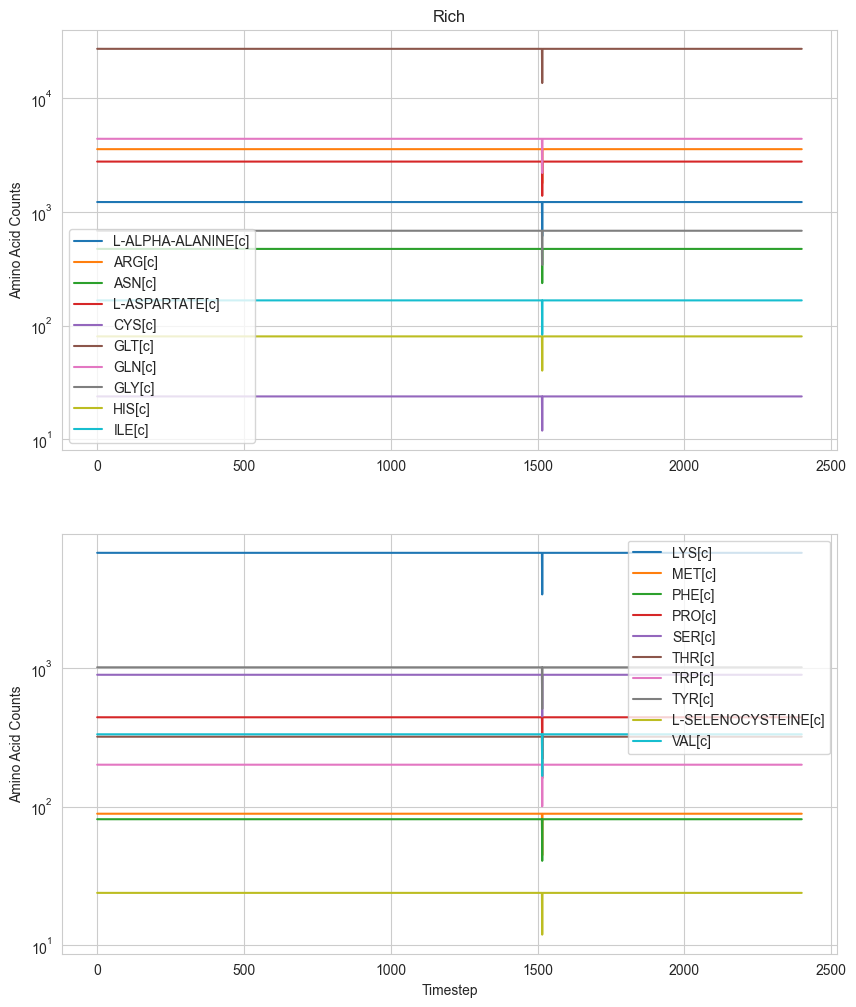

In [25]:
aa_bulk_0 = bulk_rich_0.loc[:, aa_bulk_idx]
aa_bulk_00 = bulk_rich_00.loc[:, aa_bulk_idx]
aa_bulk = pd.concat([aa_bulk_0, aa_bulk_00], axis=0, ignore_index=True)
aa_bulk.columns = aa_list

cell_mass_0 = np.array(mass_rich_0['cell_mass'])
cell_mass_00 = np.array(mass_rich_00['cell_mass'])
mass_rich = np.concatenate([cell_mass_0, cell_mass_00], axis=0)

# normalize by cell mass
aa_bulk = aa_bulk.div(mass_rich, axis=0)

# plot amino acid consumption. aa_bulk rows are timestep, columns are amino acids
# split in two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i in range(int(len(aa_list)/2)):
    axs[0].plot(aa_bulk.iloc[:,i], label=aa_list[i])
for i in range(int(len(aa_list)/2)+1, len(aa_list)):
    axs[1].plot(aa_bulk.iloc[:,i], label=aa_list[i])
axs[0].legend()
axs[0].set_ylabel('Amino Acid Counts')
axs[0].set_yscale('log')
axs[1].legend()
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Amino Acid Counts')
axs[1].set_yscale('log')
axs[0].set_title('Rich')

Text(0.5, 1.0, 'Rich')

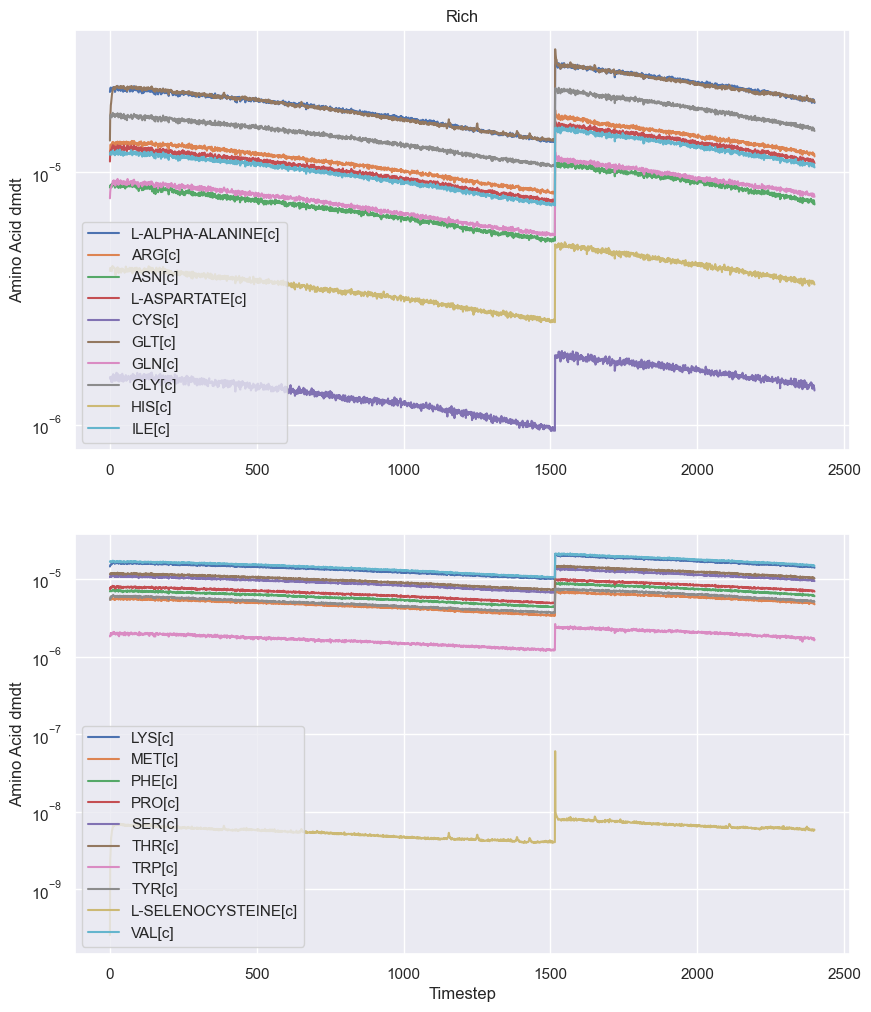

In [125]:
dmdt_0 = np.array(fba_rich_0['solution_dmdt'][1:])
dmdt_00 = np.array(fba_rich_00['solution_dmdt'])
dmdt = np.concatenate([dmdt_0, dmdt_00], axis=0)
dmdt_aa = dmdt[:, aa_met_idx]
dmdt_aa = dmdt_aa/mass_rich[1:,None]

fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i in range(int(len(aa_list)/2)):
    axs[0].plot(dmdt_aa[:,i], label=aa_list[i])
for i in range(int(len(aa_list)/2)+1, len(aa_list)):
    axs[1].plot(dmdt_aa[:,i], label=aa_list[i])
axs[0].legend()
axs[0].set_ylabel('Amino Acid dmdt')
axs[0].set_yscale('log')
axs[1].legend()
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Amino Acid dmdt')
axs[1].set_yscale('log')
axs[0].set_title('Rich')

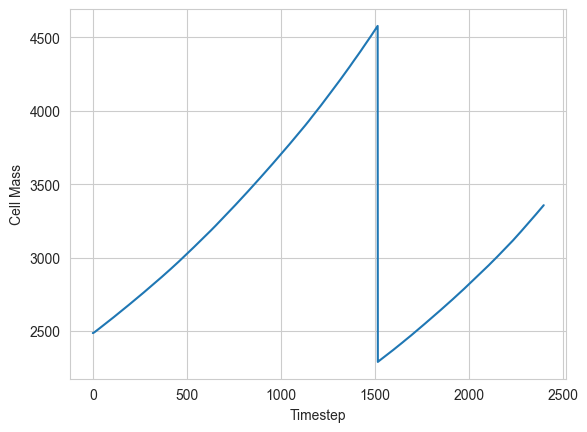

In [29]:
plt.plot(mass_rich)
plt.xlabel('Timestep')
plt.ylabel('Cell Mass')
plt.show()

Text(0.5, 1.0, 'Rich')

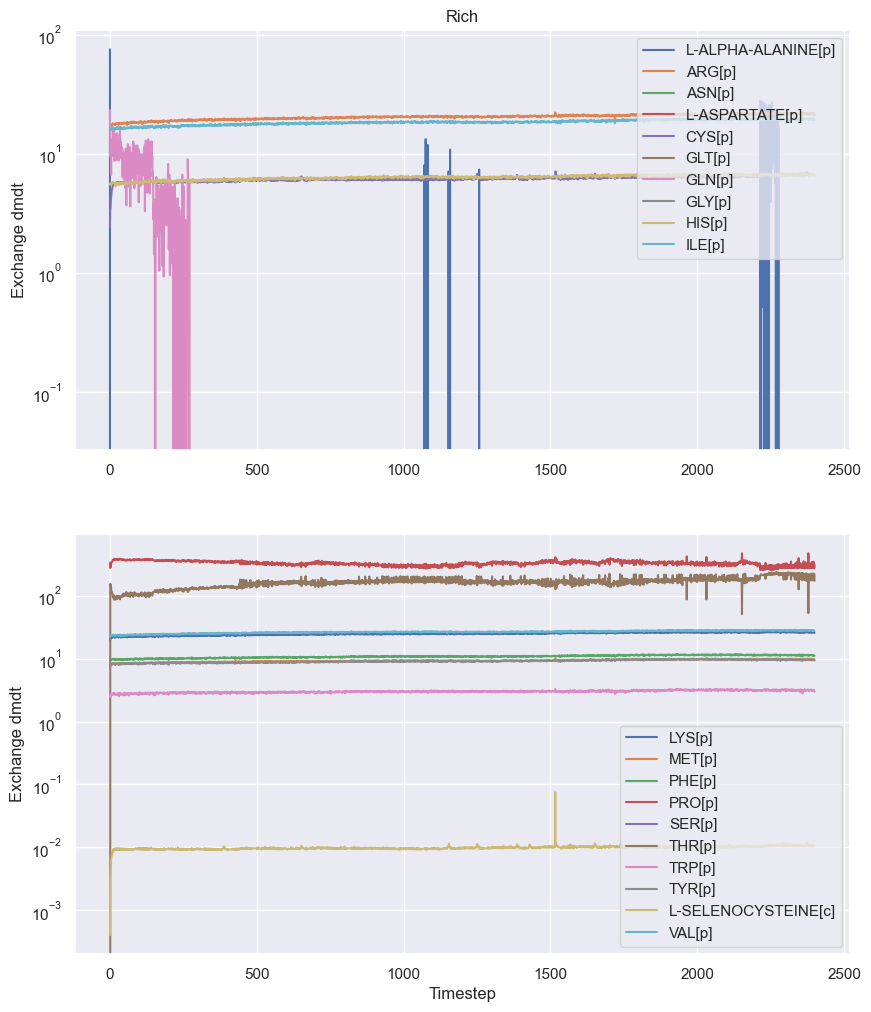

In [129]:
exchange_dmdt = np.zeros((2400,21))
exchange_molecules = []
for i, met in enumerate(aa_list):
    met = met[:-2]
    for exchange in metabolism_rich.exchange_molecules:
        if met in exchange:
            dmdt_0 = fba_rich_0['estimated_exchange_dmdt'][exchange]
            dmdt_00 = fba_rich_00['estimated_exchange_dmdt'][exchange]
            dmdt = np.concatenate([dmdt_0, dmdt_00], axis=0)
            exchange_dmdt[:,i] = dmdt
            exchange_molecules.append(exchange)
exchange_dmdt = pd.DataFrame(exchange_dmdt, columns=exchange_molecules)
exchange_dmdt = exchange_dmdt.div(mass_rich[1:,None])
# plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i in range(int(len(exchange_molecules)/2)):
    axs[0].plot(exchange_dmdt.iloc[:,i], label=exchange_molecules[i])
for i in range(int(len(exchange_molecules)/2)+1, len(exchange_molecules)):
    axs[1].plot(exchange_dmdt.iloc[:,i], label=exchange_molecules[i])
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Exchange dmdt')
axs[0].set_yscale('log')
axs[1].legend()
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Exchange dmdt')
axs[1].set_yscale('log')
axs[0].set_title('Rich')

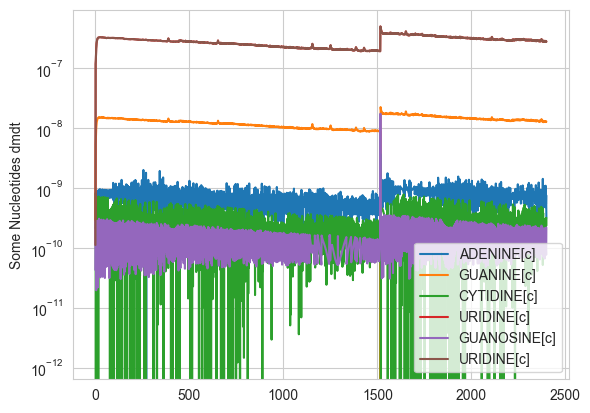

In [100]:
nucleotides = ['ADENINE[c]', 'GUANINE[c]', 'CYTIDINE[c]', 'URIDINE[c]', 'ADENOSINE[c]', 'GUANOSINE[c]', 'CYTIDINE[c]', 'URIDINE[c]']
nucleotides = ['ADENINE[c]', 'GUANINE[c]', 'CYTIDINE[c]', 'URIDINE[c]', 'GUANOSINE[c]', 'URIDINE[c]']
nucleotides_metabolism_id = [metabolism.network_flow_model.met_map[met] for met in nucleotides]
dmdt_nu = dmdt[:, nucleotides_metabolism_id]
dmdt_nu = dmdt_nu/mass_rich[1:,None]
dmdt_nu = pd.DataFrame(dmdt_nu, columns=nucleotides)

plt.figure()
for i in range(len(nucleotides)):
    plt.plot(dmdt_nu.iloc[:,i], label=nucleotides[i])
    
plt.legend()
plt.ylabel('Some Nucleotides dmdt')
plt.yscale('log')

<Axes: ylabel='Density'>

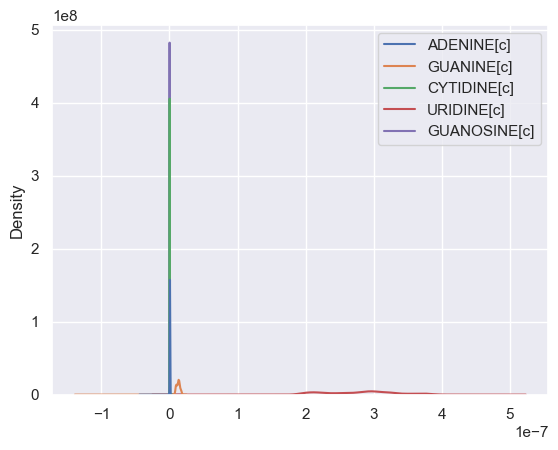

In [112]:
import seaborn as sns
sns.set(style='darkgrid')
sns.kdeplot(data = dmdt_nu)

<Axes: ylabel='Density'>

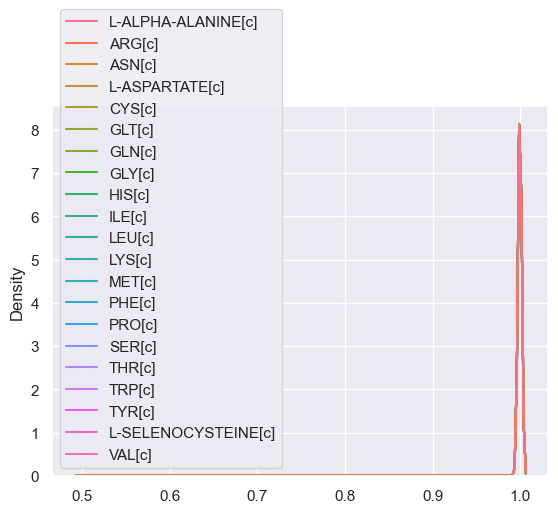

In [123]:
aa_bulk_normalized = aa_bulk.div(aa_bulk.iloc[0,:], axis=1)
sns.kdeplot(data = aa_bulk_normalized)

<Axes: xlabel='TRP[p]', ylabel='Density'>

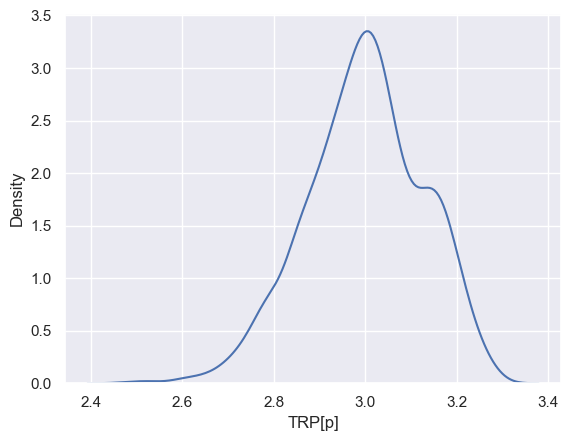

In [131]:
sns.kdeplot(data = exchange_dmdt.loc[:,'TRP[p]'])
# readjust axis
